# CZ1016 Assignment
#### Name: Mun Kei Wuai Cammy
#### Matriculation Number: U1921982B

In this assignment, the aim is to distinguish between spam and good messages. I have came up with 8 features that might be useful in the classification. 

Features:
1. Character Count
2. Word Count
3. Processed Word Count
4. Top 100 Commonly Used Spam Words
5. Top 100 Commonly Used Good Words
6. Punctuation Count
7. Digit Count
8. Uppercase Character Count

I have also built a single decision tree for each feature, a multi-variate decision tree and a forest, to find out which form of classification will give the highest classification accuaracy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import re
import string
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import pos_tag, word_tokenize
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
import graphviz

In [2]:
# import dataset
data = pd.read_table('smsdata.txt', header = None)

# rename the column header
data.columns = ["label", "message"]
data.head()

,label,message
0,good,"Go until jurong point, crazy.. Available only ..."
1,good,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,good,U dun say so early hor... U c already then say...
4,good,"Nah I don't think he goes to usf, he lives aro..."


Check the vital statistics of the dataset using the type and shape attributes.

In [3]:
print("Data type : ", type(data))
print("Data dims : ", data.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (5572, 2)


Check the variables (and their types) in the dataset using the dtypes attribute.

In [4]:
print(data.dtypes)

label      object
message    object
dtype: object


In [5]:
data.describe()

,label,message
count,5572,5572
unique,2,5158
top,good,"Sorry, I'll call later"
freq,4825,30


In [6]:
data.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
good     4825   4516                             Sorry, I'll call later   30
spam      747    642  Please call our customer service representativ...    4

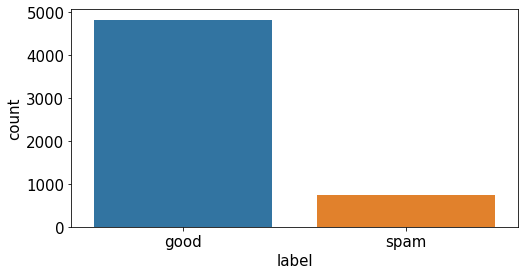

In [7]:
# plotting number of spam and good
label_count = pd.DataFrame()
label_count['count'] = data['label'].value_counts()
fig, ax = plt.subplots(figsize = (8, 4))
sb.barplot(x = label_count.index, y = label_count['count'], ax = ax)
ax.set_ylabel('count', fontsize = 15)
ax.set_xlabel('label',fontsize = 15)
ax.tick_params(labelsize=15)

From the barplot seen above, there is an uneven distribution of dataset which consists of many good messages but only a fraction of spam messages. Hence, the result derived later might not have a high rate of accuracy.

# Feature 1: Character Count
- includes all letters, numbers, spaces and punctuations
- using Decision Tree to derive classification accuracy

In [8]:
# calculating the length of all the messages
data['char_count']=data['message'].apply(len)

# converting labels to numeric labels
# good = 0 and spam = 1
data['label_num']=data.label.map({'good':0,'spam':1})
data.head()

,label,message,char_count,label_num
0,good,"Go until jurong point, crazy.. Available only ...",111,0
1,good,Ok lar... Joking wif u oni...,29,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1
3,good,U dun say so early hor... U c already then say...,49,0
4,good,"Nah I don't think he goes to usf, he lives aro...",61,0


Train Set : (4179, 1) (4179, 1)
Test Set  : (1393, 1) (1393, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8927973199329984

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8815506101938263



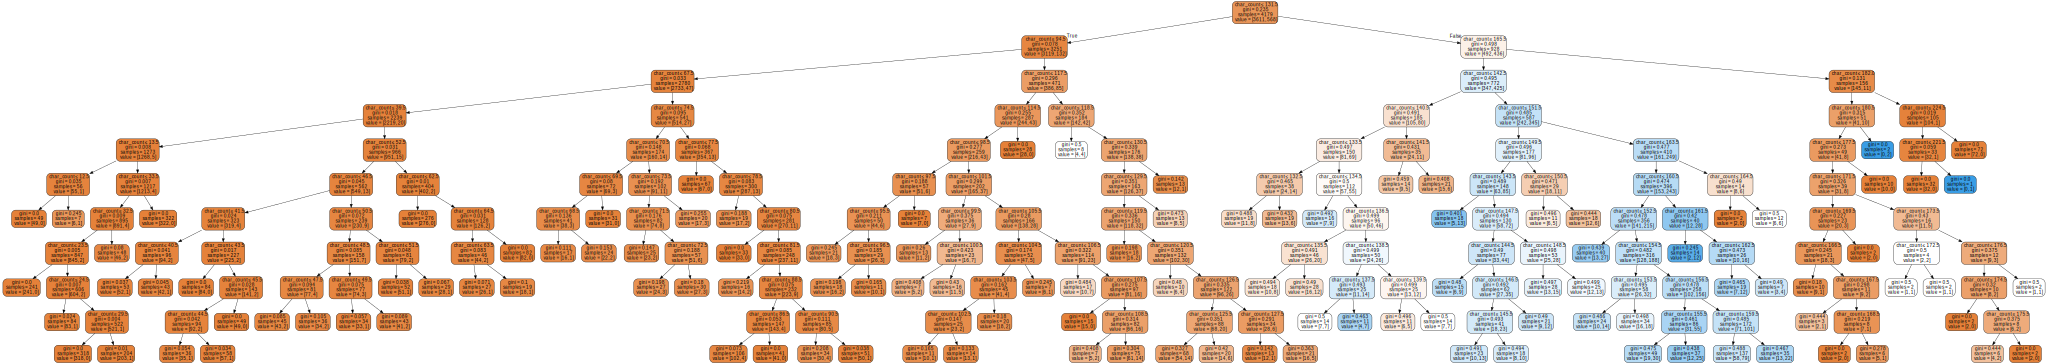

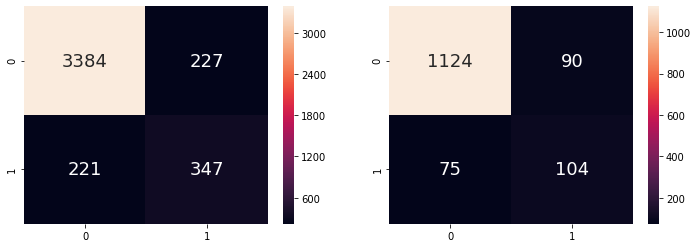

In [9]:
# loading our features and target to train
LN = pd.DataFrame(data['label_num'])        # Response
CC = pd.DataFrame(data['char_count'])       # Predictor

# spliting data into 75% train and 25% test for CC
X_train, X_test, y_train, y_test = train_test_split(CC, LN, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 10)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

# Predict label_num values corresponding to CC
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

# Feature 2: Word Count
- counts the number of words (excludes spaces and punctuations)
- using Decision Tree to derive classification accuracy

In [10]:
data['word_count'] = data['message'].apply(lambda x: len([w for w in x.split(' ')]))

In [11]:
data.head()

,label,message,char_count,label_num,word_count
0,good,"Go until jurong point, crazy.. Available only ...",111,0,20
1,good,Ok lar... Joking wif u oni...,29,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28
3,good,U dun say so early hor... U c already then say...,49,0,11
4,good,"Nah I don't think he goes to usf, he lives aro...",61,0,13


In [12]:
# loading our features and target to train
LN = pd.DataFrame(data['label_num'])          # Response
WC = pd.DataFrame(data['word_count'])         # Predictor

Train Set : (4179, 1) (4179, 1)
Test Set  : (1393, 1) (1393, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.869825317061498

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8729361091170137



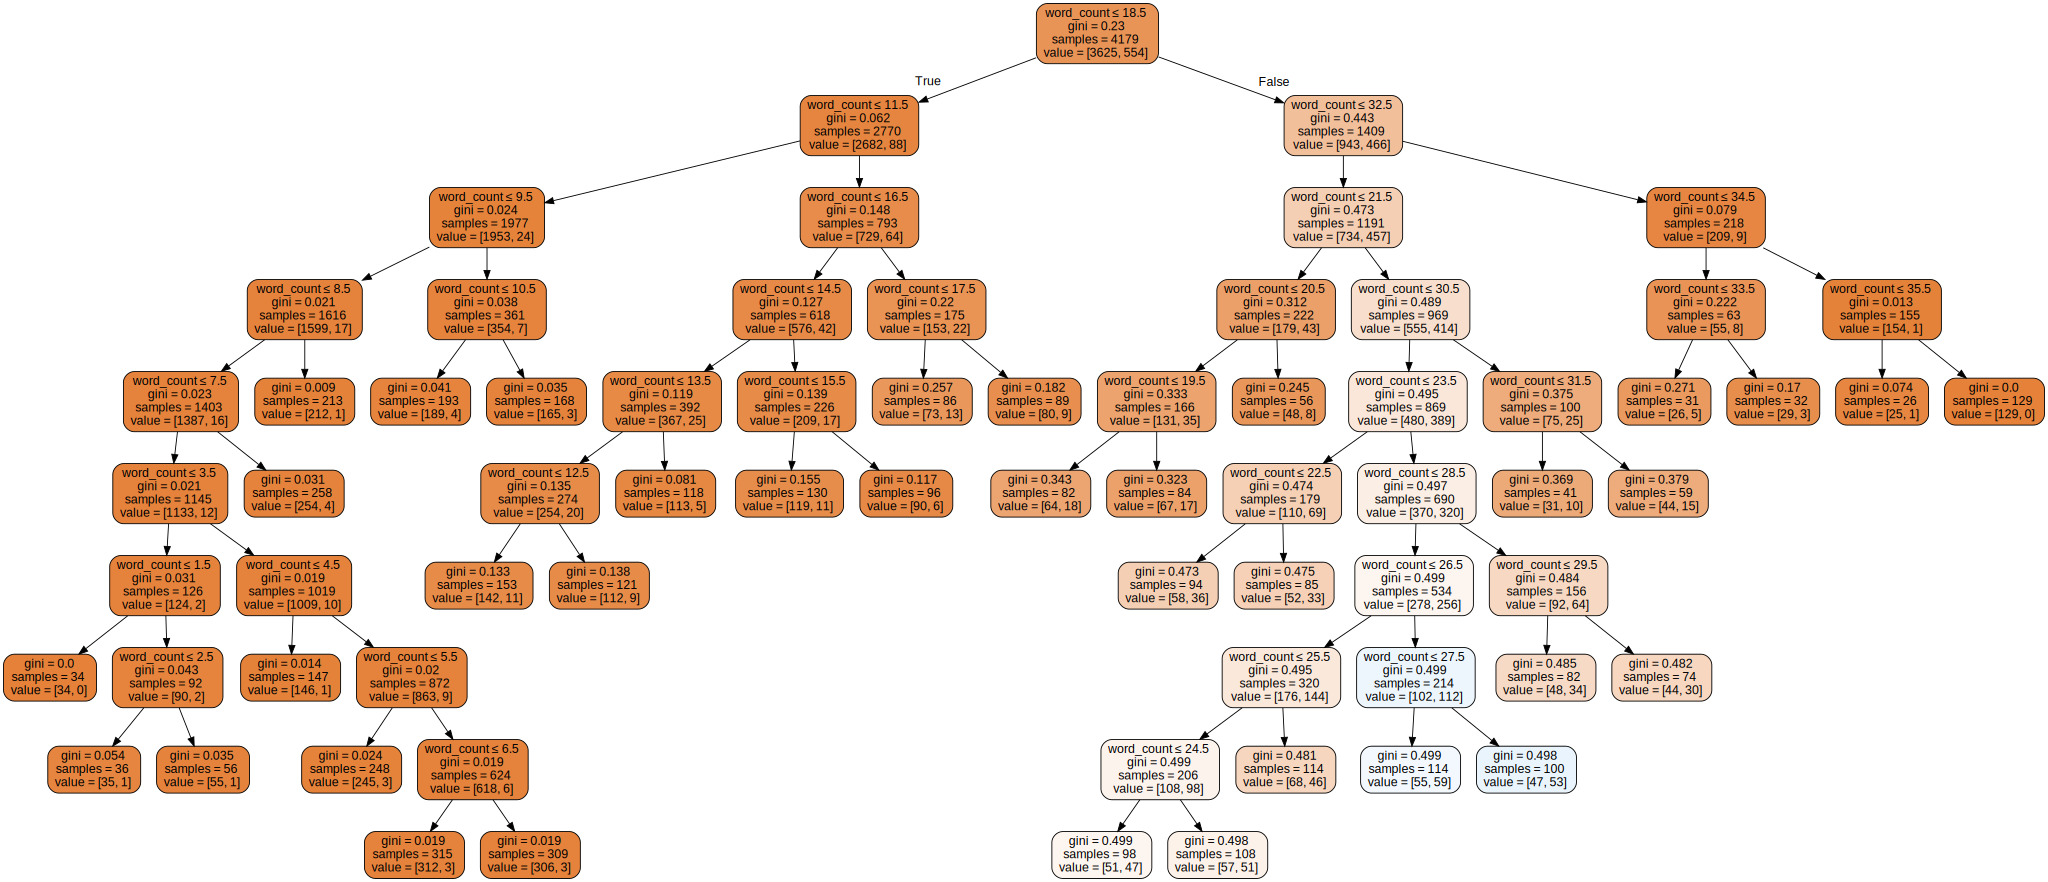

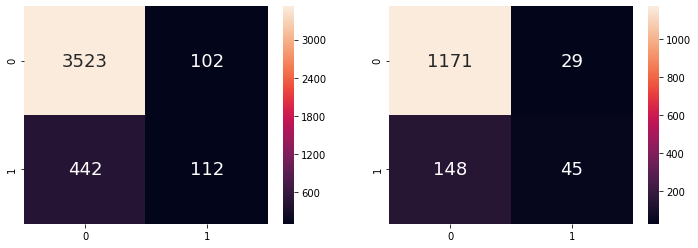

In [13]:
# spliting data into 75% train and 25% test for WC
X_train, X_test, y_train, y_test = train_test_split(WC, LN, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 10)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

# Predict label_num values corresponding to WC
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

# Feature 3: Processed Word Count
- excludes punctuations, spaces, stopwords and words with length smaller than 3
- using Decision Tree to derive classification accuracy

In [14]:
#remove punctutations, stopwords and words with length smaller than 3 letters
stop_words = set(stopwords.words('english'))
def wordCount(text):
    try:
        text = text.lower()
        regex = re.compile('['+re.escape(string.punctuation) + '0-9\\r\\t\\n]') 
        #remove punctuation
        txt = regex.sub(' ',text) 
        # remove stop words and words with length smaller than 3 letters
        words = [w for w in txt.split(' ') if not w in stop_words and len(w)>3]
        return len(words)
    except:
        return 0

In [15]:
data['processed_word_count'] = data['message'].apply(lambda x: wordCount(x))

In [16]:
data.head()

,label,message,char_count,label_num,word_count,processed_word_count
0,good,"Go until jurong point, crazy.. Available only ...",111,0,20,10
1,good,Ok lar... Joking wif u oni...,29,0,6,1
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,12
3,good,U dun say so early hor... U c already then say...,49,0,11,2
4,good,"Nah I don't think he goes to usf, he lives aro...",61,0,13,5


In [17]:
data.describe()

,char_count,label_num,word_count,processed_word_count
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,80.457107,0.134063,15.676238,6.418880
std,59.938275,0.340751,11.485406,4.966344
min,2.000000,0.000000,1.000000,0.000000
25%,36.000000,0.000000,7.000000,3.000000
50%,61.000000,0.000000,12.000000,5.000000
75%,122.000000,0.000000,23.000000,9.000000
max,910.000000,1.000000,171.000000,64.000000


From the graph above, we can see that spam messages are much longer in length than good messages.

Train Set : (4179, 1) (4179, 1)
Test Set  : (1393, 1) (1393, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8667145250059823

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8585786073223259



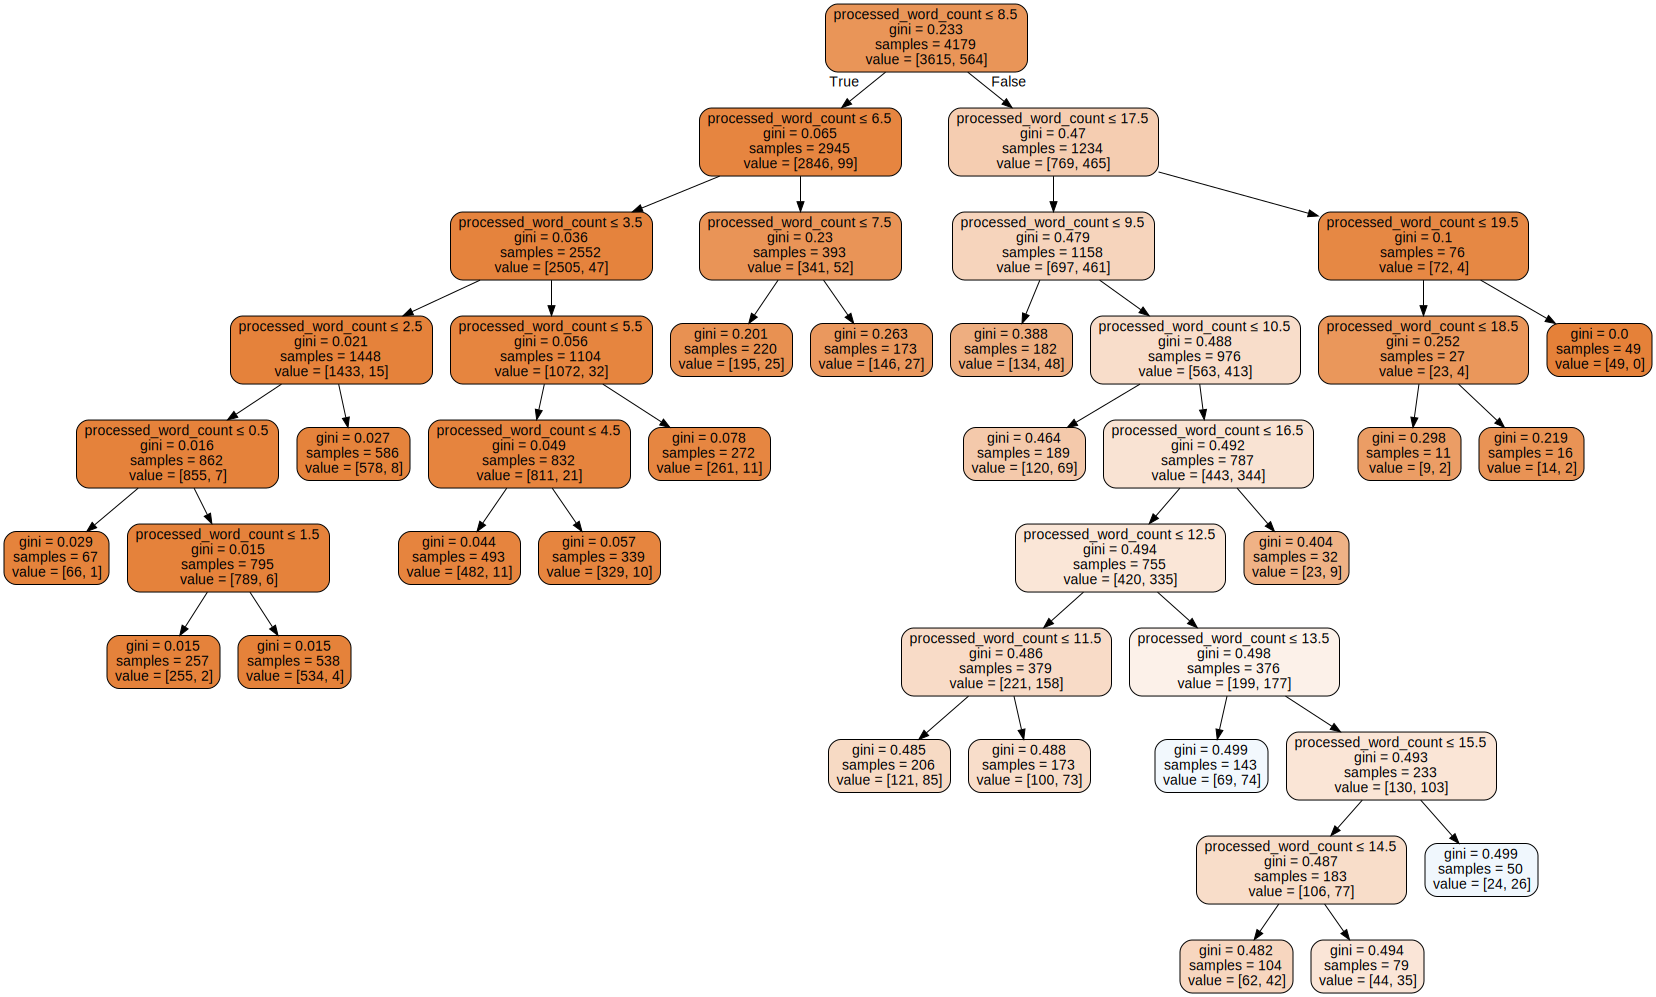

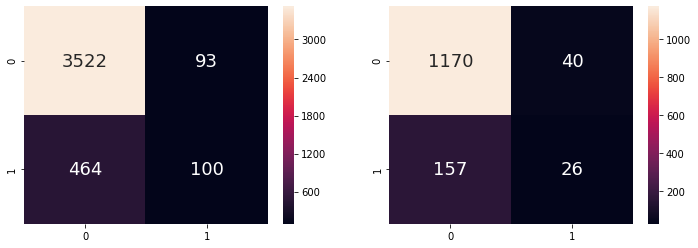

In [18]:
# loading our features and target to train
LN = pd.DataFrame(data['label_num'])                 # Response
PW = pd.DataFrame(data['processed_word_count'])      # Predictor

# spliting data into 75% train and 25% test for PW
X_train, X_test, y_train, y_test = train_test_split(PW, LN, test_size = 0.25)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 10)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

# Predict label_num values corresponding to PW
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

## Feature 4: Top 100 Commonly Used Spam Words
- using Decision Tree to derive classification accuracy

In [19]:
def tokenize(text):
    exclude = set(string.punctuation)
    #remove punctuation
    regex = re.compile('[' +re.escape(string.punctuation) + '0-9\\r\\t\\n]') 
    text = regex.sub(' ', text)
    # tokenize the text
    tokens = nltk.word_tokenize(text)
    # remove stop words
    tokens = list(filter(lambda x: x.lower() not in stop_words, tokens))
    # remove words with length less than 3
    tokens = [w.lower() for w in tokens if len(w) >=3] 
    tokens = [w for w in tokens if re.search('[a-zA-Z]', w)]
    return tokens

In [91]:
# create sub-dataframe of spam text
spam_data = data[data['label'] == 'spam']

# sub-dataframe of good text
good_data = data[data['label'] == 'good']

spam_data['tokens'] = spam_data['message'].map(tokenize)
good_data['tokens'] = good_data['message'].map(tokenize)

spam_words = []
for token in spam_data['tokens']:
    #combine text in different columns in one list
    spam_words = spam_words + token
    
good_words = []
for token in good_data['tokens']:
    good_words += token

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


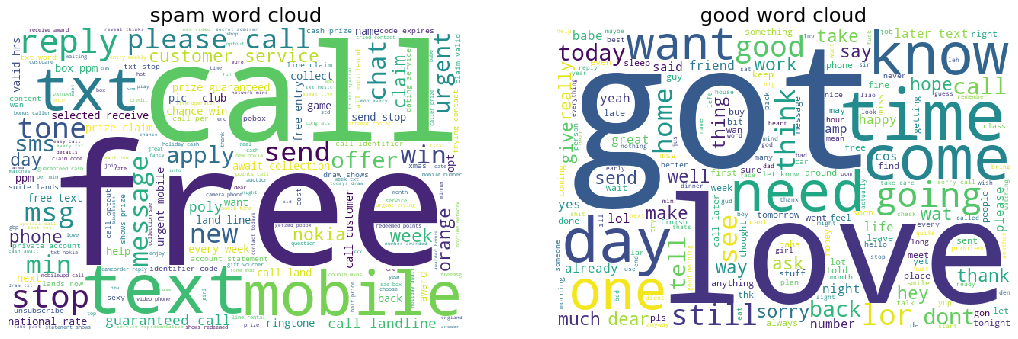

In [21]:
# create a word cloud to better visualise the frequency of words used
spam_words_str = ' '.join(spam_words)
good_words_str = ' '.join(good_words)

spam_word_cloud = WordCloud(width = 600, height = 400, background_color = 'white').generate(spam_words_str)
good_word_cloud = WordCloud(width = 600, height = 400,background_color = 'white').generate(good_words_str)

fig, (ax, ax2) = plt.subplots(1,2, figsize = (18,8))
ax.imshow(spam_word_cloud)
ax.axis('off')
ax.set_title('spam word cloud', fontsize = 20)
ax2.imshow(good_word_cloud)
ax2.axis('off')
ax2.set_title('good word cloud', fontsize = 20)
plt.show()

From the above wordcloud, we can see that the more commonly used words are bigger in size. We can find the top 10 commonly used words in spam and good respectively using the method below.

Text(0.5, 1.0, 'good top 10 words')

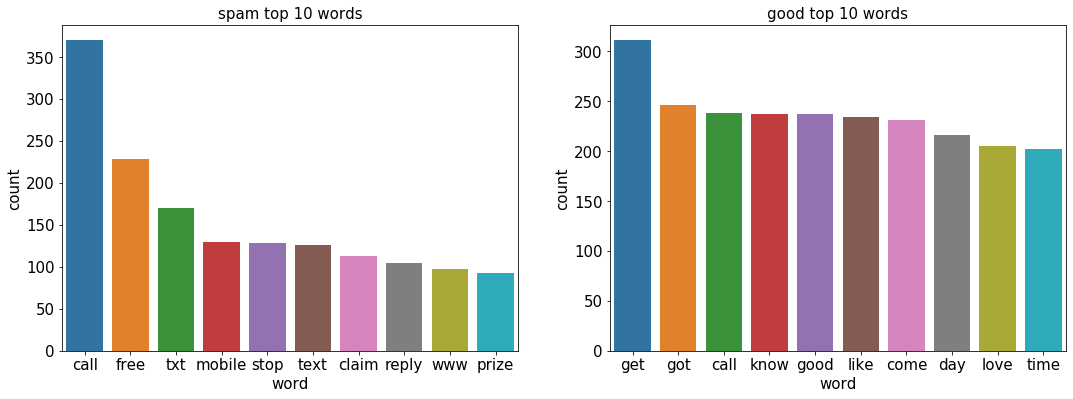

In [22]:
# take a look the 10 most common words in spam and good
spam_count = Counter(spam_words).most_common(10)
good_count = Counter(good_words).most_common(10)

spam_count_data = pd.DataFrame(spam_count, columns = ['word', 'count'])
good_count_data = pd.DataFrame(good_count, columns = ['word', 'count'])

fig, (ax,ax1) = plt.subplots(1,2,figsize = (18, 6))
sb.barplot(x = spam_count_data['word'], y = spam_count_data['count'], ax = ax)
ax.set_ylabel('count', fontsize = 15)
ax.set_xlabel('word',fontsize = 15)
ax.tick_params(labelsize=15)
ax.set_title('spam top 10 words', fontsize = 15)

sb.barplot(x = good_count_data['word'], y = good_count_data['count'], ax = ax1)
ax1.set_ylabel('count', fontsize = 15)
ax1.set_xlabel('word',fontsize = 15)
ax1.tick_params(labelsize=15)
ax1.set_title('good top 10 words', fontsize = 15)

In [23]:
# creating another column called new_message which shows the message 
# in lowercase, without stopwords, punctuations, numbers and after lemmatisation

# making all words into lowercase
data['new_message'] = data['message'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# removing all punctuations
data['new_message'] = data['new_message'].str.replace('[^\w\s]','')

# removing stopwords
stop = stopwords.words('english')
data['new_message'] = data['new_message'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# remove numbers
data['new_message'] = data['new_message'].apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))

# remove words with length < 3
data['new_message'] = data['new_message'].apply(lambda x: " ".join(x for x in x.split() if len(x) >=3))

# do lemmatisation to get the root word
from textblob import Word
data['new_message'] = data['new_message'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

In [24]:
#removal of rare words as they are unlikely to help in classification
freq_rare_words = pd.Series(' '.join(data['new_message']).split()).value_counts()[-30:]
freq_rare_words

availablethey     1
univ              1
starer            1
chennaibecause    1
parantella        1
stalk             1
tootsie           1
rudi              1
80122300pwk       1
vargu             1
occasion          1
reminds           1
carpark           1
tryin             1
fffff             1
shinco            1
juliana           1
textand           1
australia         1
dine              1
mufti             1
chrgd50p          1
clue              1
ijust             1
k718              1
notixiquating     1
andor             1
cresubi           1
bsnl              1
coughing          1
dtype: int64

In [25]:
freq_rare_words = list(freq_rare_words.index)
data['new_message'] = data['new_message'].apply(lambda x: " ".join(x for x in x.split() if x not in freq_rare_words))

It was found that using only the top 10 most commonly used words will not give an accurate classification of spam and good messages as many of the messages, be it spam or good, do not contain any of those 10 words. Hence, a larger number will be a better gauge. Top 100 most commonly used words will be used as a feature as seen below.

In [26]:
# get the top 100 most commonly used spam words
freq_spam = pd.Series(spam_words_str.split()).value_counts()[:100]
freq_spam

call       370
free       228
txt        170
mobile     129
stop       128
          ... 
see         19
account     19
colour      19
await       19
price       18
Length: 100, dtype: int64

In [27]:
data['no of words present in top100_spam_words'] = data['message'].apply(lambda x: len([x for x in x.split() if x in freq_spam]))

In [28]:
data.head()

,label,message,char_count,label_num,word_count,processed_word_count,new_message,no of words present in top100_spam_words
0,good,"Go until jurong point, crazy.. Available only ...",111,0,20,10,jurong point crazy available bugis great world...,0
1,good,Ok lar... Joking wif u oni...,29,0,6,1,lar joking wif oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,12,free entry wkly comp win cup final tkts 21st m...,6
3,good,U dun say so early hor... U c already then say...,49,0,11,2,dun say early hor already say,0
4,good,"Nah I don't think he goes to usf, he lives aro...",61,0,13,5,nah dont think go usf life around though,0


Train Set : (4179, 1) (4179, 1)
Test Set  : (1393, 1) (1393, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9078726968174204

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.905240488155061



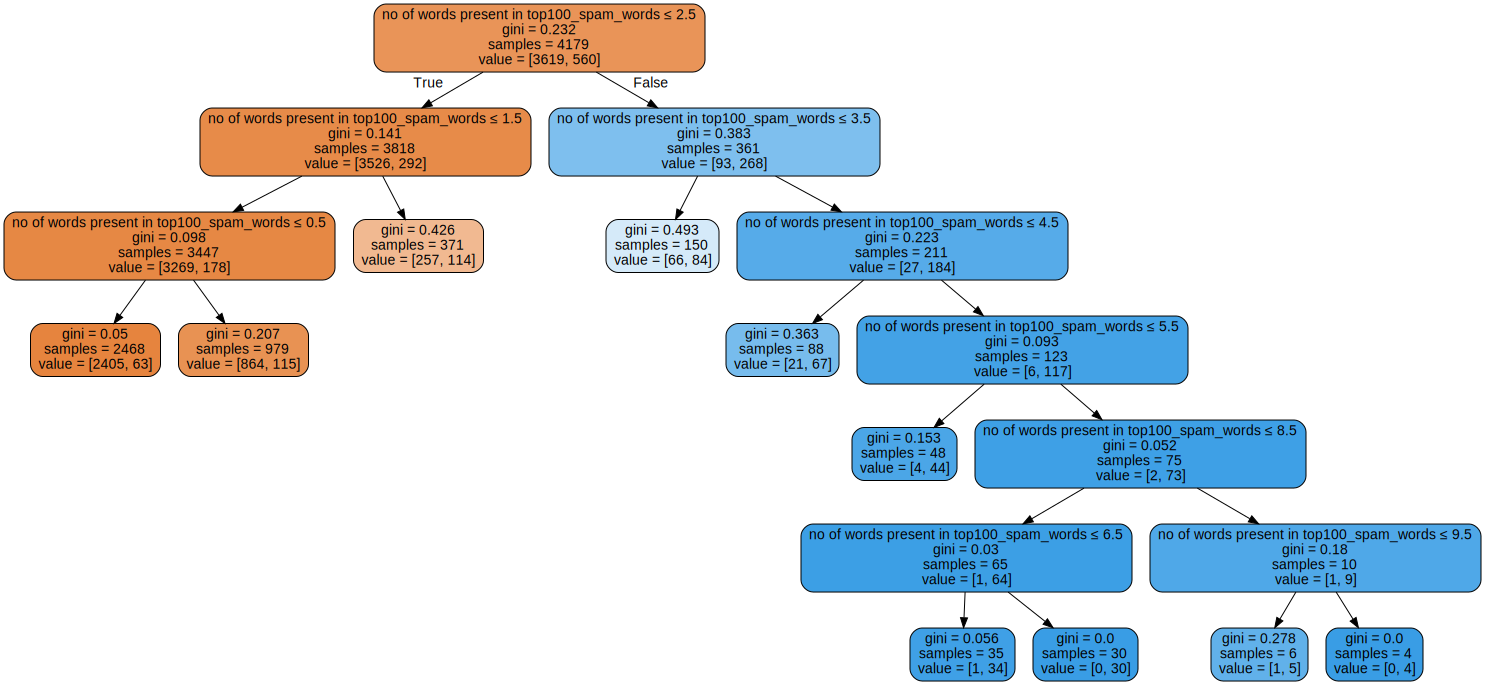

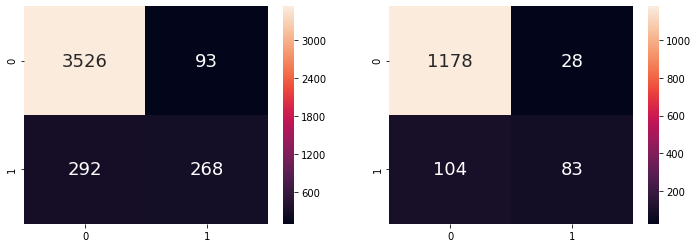

In [29]:
# loading our features and target to train
LN = pd.DataFrame(data['label_num'])                                     # Response
SW = pd.DataFrame(data['no of words present in top100_spam_words'])      # Predictor

# spliting data into 75% train and 25% test for SW
X_train, X_test, y_train, y_test = train_test_split(SW, LN, test_size = 0.25)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 10)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

# Predict label_num values corresponding to SW
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

# Feature 5: Top 100 Commonly Used Good Words
    - using Decision Tree to derive classification accuracy

In [30]:
# get the top 100 most commonly used good words
freq_good = pd.Series(good_words_str.split()).value_counts()[:100]
freq_good

get      311
got      246
call     238
know     237
good     237
        ... 
msg       57
first     57
money     56
many      56
dun       55
Length: 100, dtype: int64

In [31]:
data['no of words present in top100_good_words'] = data['message'].apply(lambda x: len([x for x in x.split() if x in freq_good]))
data.head()

,label,message,char_count,label_num,word_count,processed_word_count,new_message,no of words present in top100_spam_words,no of words present in top100_good_words
0,good,"Go until jurong point, crazy.. Available only ...",111,0,20,10,jurong point crazy available bugis great world...,0,2
1,good,Ok lar... Joking wif u oni...,29,0,6,1,lar joking wif oni,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,12,free entry wkly comp win cup final tkts 21st m...,6,0
3,good,U dun say so early hor... U c already then say...,49,0,11,2,dun say early hor already say,0,3
4,good,"Nah I don't think he goes to usf, he lives aro...",61,0,13,5,nah dont think go usf life around though,0,2


Train Set : (4179, 1) (4179, 1)
Test Set  : (1393, 1) (1393, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8645608997367792

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8700646087580761



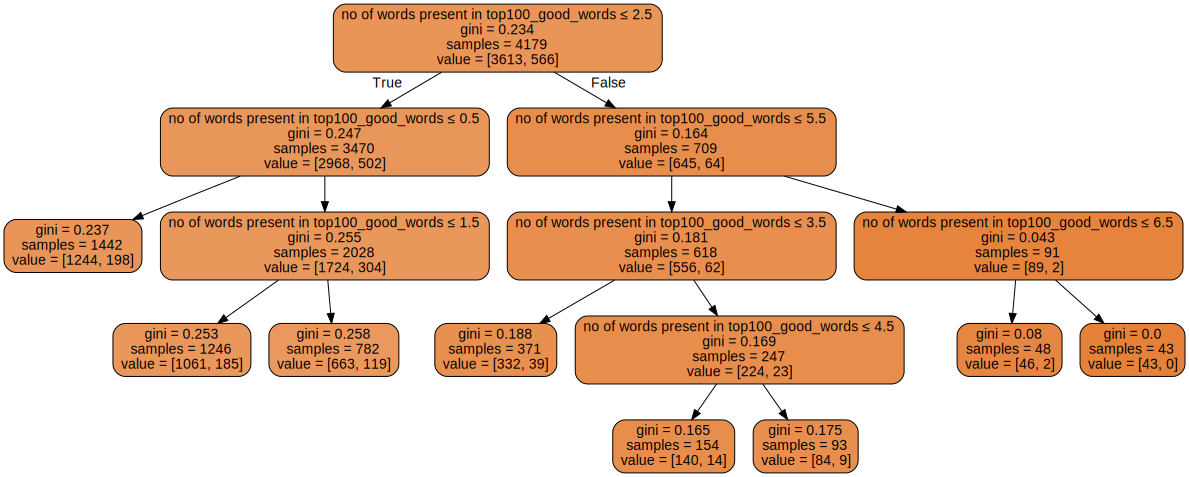

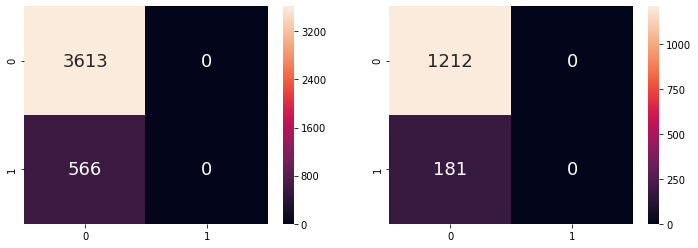

In [32]:
# loading our features and target to train
LN = pd.DataFrame(data['label_num'])                                     # Response
GW = pd.DataFrame(data['no of words present in top100_good_words'])      # Predictor

# spliting data into 75% train and 25% test for GW
X_train, X_test, y_train, y_test = train_test_split(GW, LN, test_size = 0.25)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 10)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

# Predict label_num values corresponding to GW
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

# Feature 6: Punctuation Count
- using Decision Tree to derive classification accuracy

In [33]:
from string import punctuation
punctuations = " ".join(punctuation)
print(punctuations)

! " # $ % & ' ( ) * + , - . / : ; < = > ? @ [ \ ] ^ _ ` { | } ~


In [34]:
data['punctuation_count'] = data['message'].apply(lambda x: len([w for w in x.split() for y in w if y in punctuations]))

In [35]:
data.head()

,label,message,char_count,label_num,word_count,processed_word_count,new_message,no of words present in top100_spam_words,no of words present in top100_good_words,punctuation_count
0,good,"Go until jurong point, crazy.. Available only ...",111,0,20,10,jurong point crazy available bugis great world...,0,2,9
1,good,Ok lar... Joking wif u oni...,29,0,6,1,lar joking wif oni,0,0,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,12,free entry wkly comp win cup final tkts 21st m...,6,0,6
3,good,U dun say so early hor... U c already then say...,49,0,11,2,dun say early hor already say,0,3,6
4,good,"Nah I don't think he goes to usf, he lives aro...",61,0,13,5,nah dont think go usf life around though,0,2,2


Train Set : (4179, 1) (4179, 1)
Test Set  : (1393, 1) (1393, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.8691074419717636

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.8564249820531228



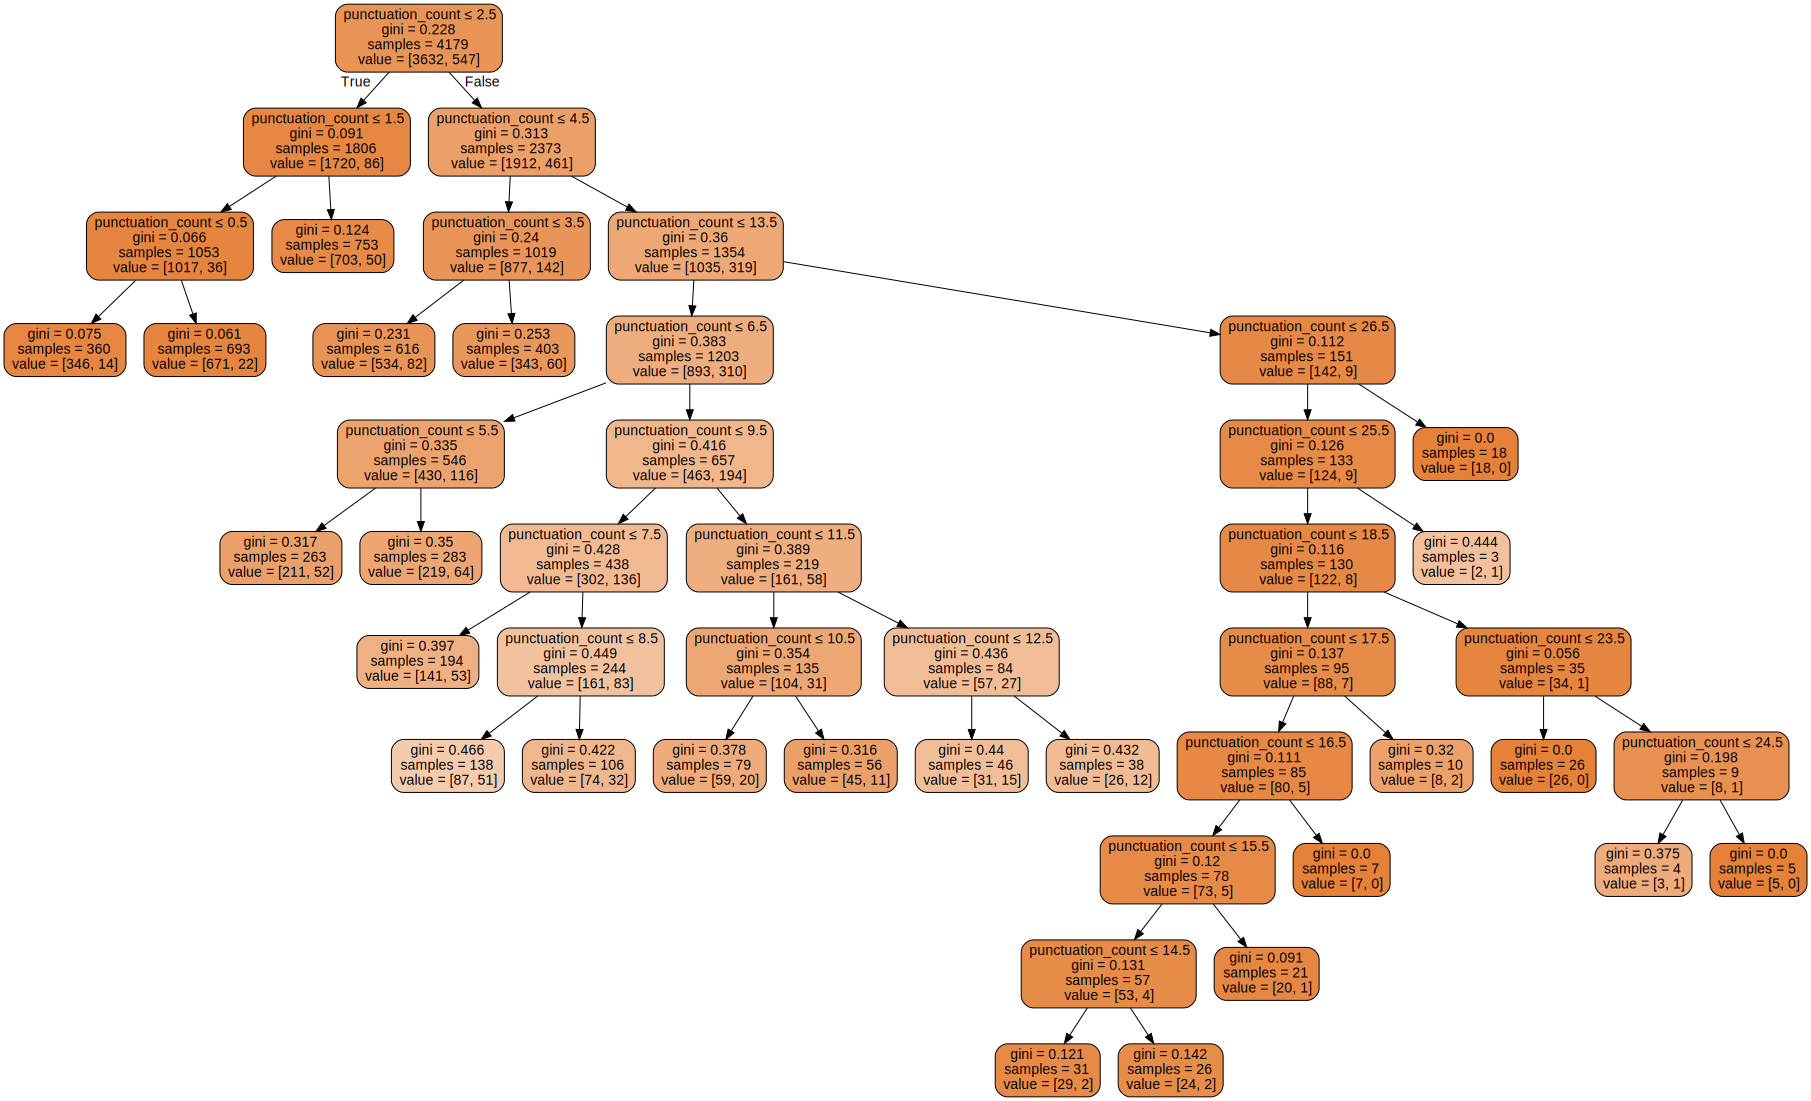

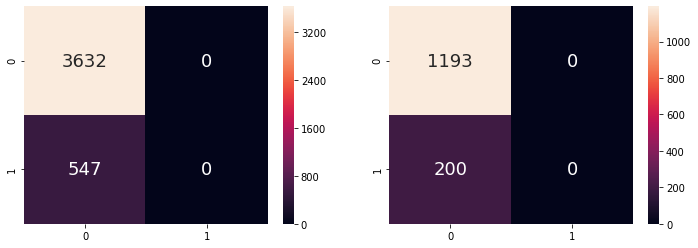

In [36]:
# loading our features and target to train
LN = pd.DataFrame(data['label_num'])              # Response
PC = pd.DataFrame(data['punctuation_count'])      # Predictor

# spliting data into 75% train and 25% test for PC
X_train, X_test, y_train, y_test = train_test_split(PC, LN, test_size = 0.25)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 10)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

# Predict label_num values corresponding to PC
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

# Feature 7: Digits Count
- using Decision Tree to derive classification accuracy

In [37]:
data['digit_count'] = data['message'].apply(lambda x: len([w for w in x.split() for y in w if y.isdigit()]))

Deciding between whether to use count of digits or count of numbers (ie "Hi my number is 12345678 or 987654321", count of digits = 16 but count of numbers = 2), count of digits might be a better feature than numbers as it can bring out the intensity of use of numerical values.

In [38]:
data.head()

,label,message,char_count,label_num,word_count,processed_word_count,new_message,no of words present in top100_spam_words,no of words present in top100_good_words,punctuation_count,digit_count
0,good,"Go until jurong point, crazy.. Available only ...",111,0,20,10,jurong point crazy available bugis great world...,0,2,9,0
1,good,Ok lar... Joking wif u oni...,29,0,6,1,lar joking wif oni,0,0,6,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,12,free entry wkly comp win cup final tkts 21st m...,6,0,6,25
3,good,U dun say so early hor... U c already then say...,49,0,11,2,dun say early hor already say,0,3,6,0
4,good,"Nah I don't think he goes to usf, he lives aro...",61,0,13,5,nah dont think go usf life around though,0,2,2,0


Train Set : (4179, 1) (4179, 1)
Test Set  : (1393, 1) (1393, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9727207465900933

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9784637473079684



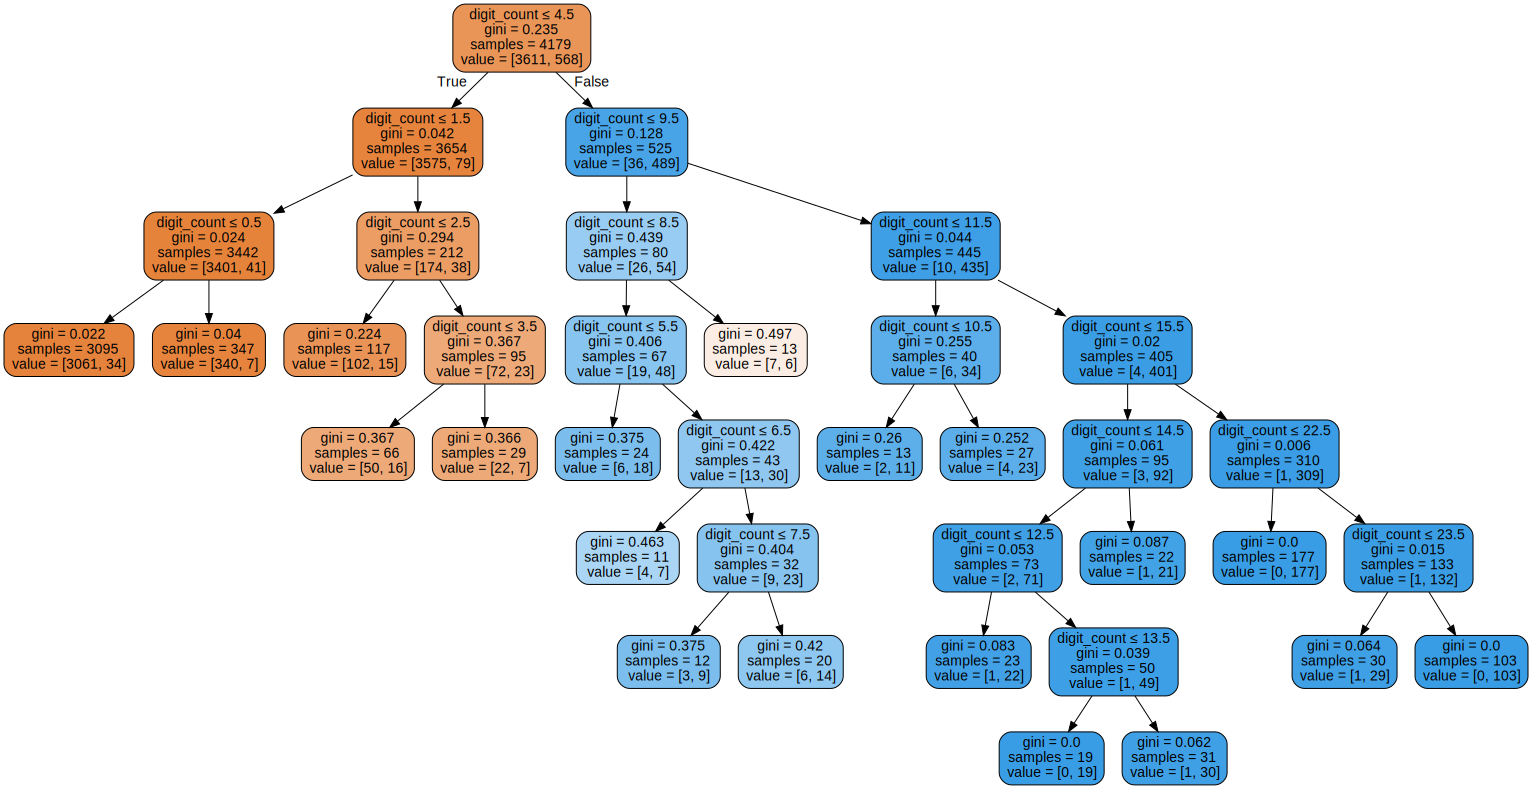

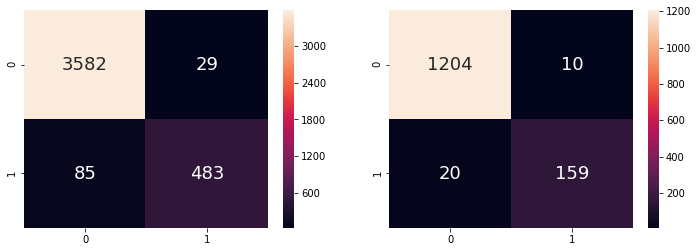

In [39]:
# loading our features and target to train
LN = pd.DataFrame(data['label_num'])              # Response
DC = pd.DataFrame(data['digit_count'])            # Predictor

# spliting data into 75% train and 25% test for DC
X_train, X_test, y_train, y_test = train_test_split(DC, LN, test_size = 0.25)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 10)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

# Predict label_num values corresponding to DC
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

# Feature 8: Uppercase Character Count
- using Decision Tree to derive classification accuracy

In [40]:
data['upperchar_count'] = data['message'].apply(lambda x: len([w for w in x.split() for y in w if y.isupper()]))

In [41]:
data.head()

,label,message,char_count,label_num,word_count,processed_word_count,new_message,no of words present in top100_spam_words,no of words present in top100_good_words,punctuation_count,digit_count,upperchar_count
0,good,"Go until jurong point, crazy.. Available only ...",111,0,20,10,jurong point crazy available bugis great world...,0,2,9,0,3
1,good,Ok lar... Joking wif u oni...,29,0,6,1,lar joking wif oni,0,0,6,0,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,1,28,12,free entry wkly comp win cup final tkts 21st m...,6,0,6,25,10
3,good,U dun say so early hor... U c already then say...,49,0,11,2,dun say early hor already say,0,3,6,0,2
4,good,"Nah I don't think he goes to usf, he lives aro...",61,0,13,5,nah dont think go usf life around though,0,2,2,0,2


Train Set : (4179, 1) (4179, 1)
Test Set  : (1393, 1) (1393, 1)
Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9191194065565925

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9073941134242641



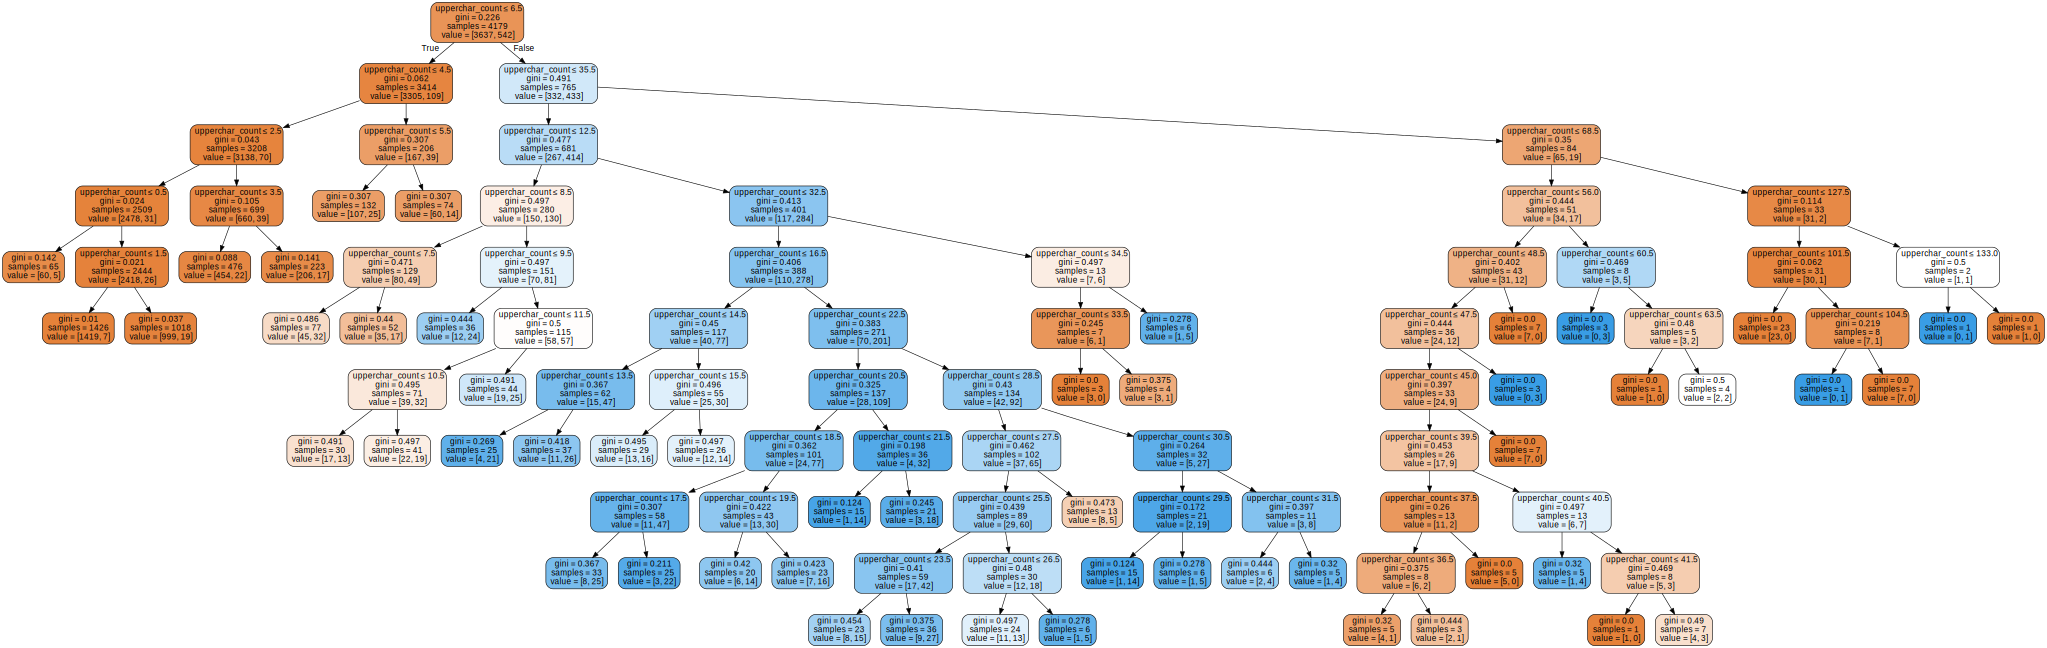

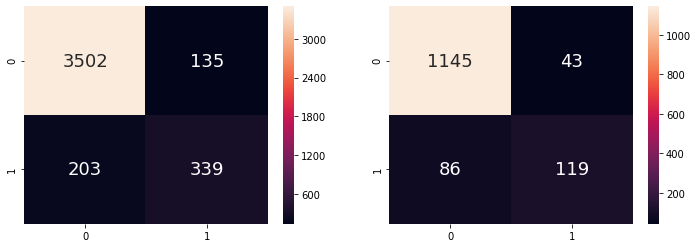

In [42]:
# loading our features and target to train
LN = pd.DataFrame(data['label_num'])              # Response
UC = pd.DataFrame(data['upperchar_count'])            # Predictor

# spliting data into 75% train and 25% test for UC
X_train, X_test, y_train, y_test = train_test_split(UC, LN, test_size = 0.25)

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 10)

# Train the Decision Tree Classifier model
dectree.fit(X_train, y_train)

# Predict label_num values corresponding to UC
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Import export_graphviz from sklearn.tree
from sklearn.tree import export_graphviz

# Export the Decision Tree as a dot object
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

# Render using graphviz
import graphviz
graphviz.Source(treedot)

# Using Multi-Variate Decision Tree for Features 1-7

In [43]:
# Extract Response and Predictors
y = pd.DataFrame(data["label_num"])
X = pd.DataFrame(data[["char_count", "processed_word_count", "word_count", "no of words present in top100_spam_words", "punctuation_count", "digit_count", "upperchar_count", "no of words present in top100_good_words"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (4179, 1) (4179, 8)
Test Set  : (1393, 1) (1393, 8)


In [44]:
# Summary Statistics for Response
y_train["label_num"].value_counts()

0    3616
1     563
Name: label_num, dtype: int64

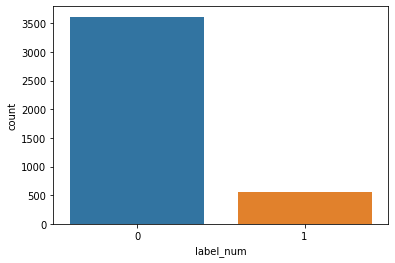

In [45]:
# Draw the distribution of Response
sb.countplot(y_train["label_num"])

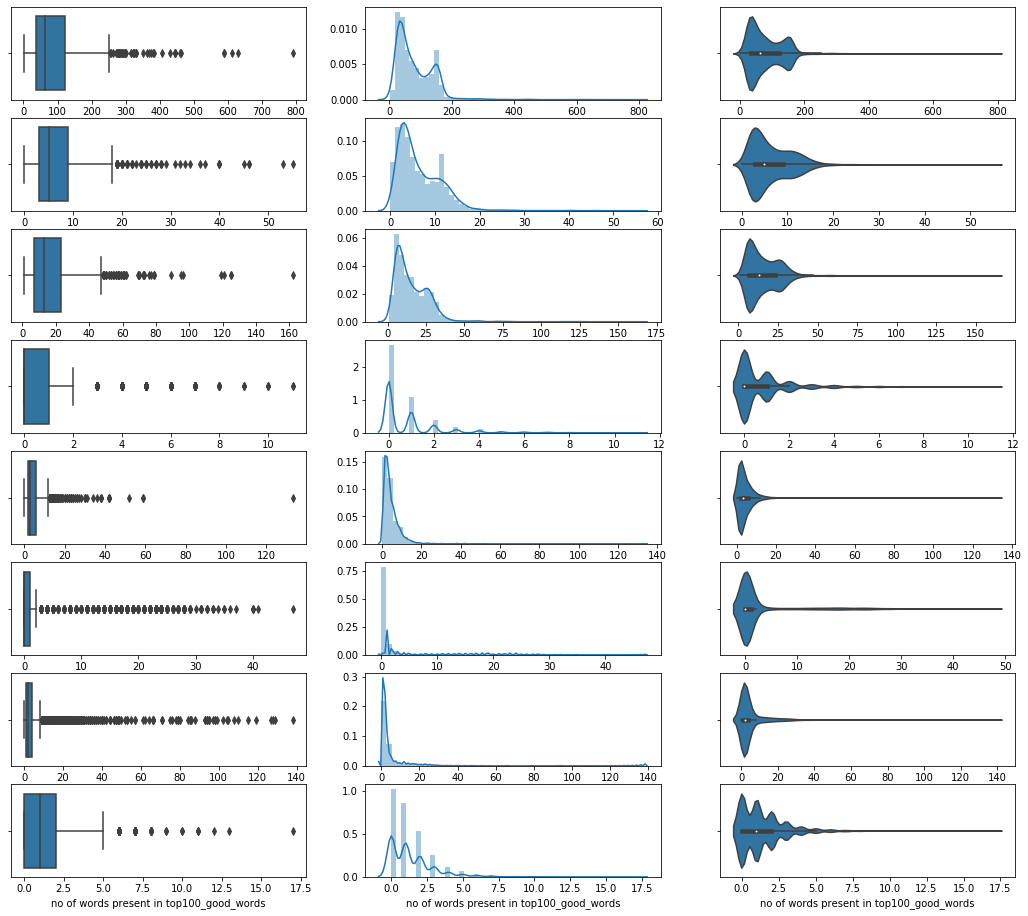

In [46]:
# Draw the distributions of all Predictors
f, axes = plt.subplots(8, 3, figsize=(18, 16))

count = 0
for var in X_train:
    sb.boxplot(X_train[var], orient = "h", ax = axes[count,0])
    sb.distplot(X_train[var], ax = axes[count,1])
    sb.violinplot(X_train[var], ax = axes[count,2])
    count += 1

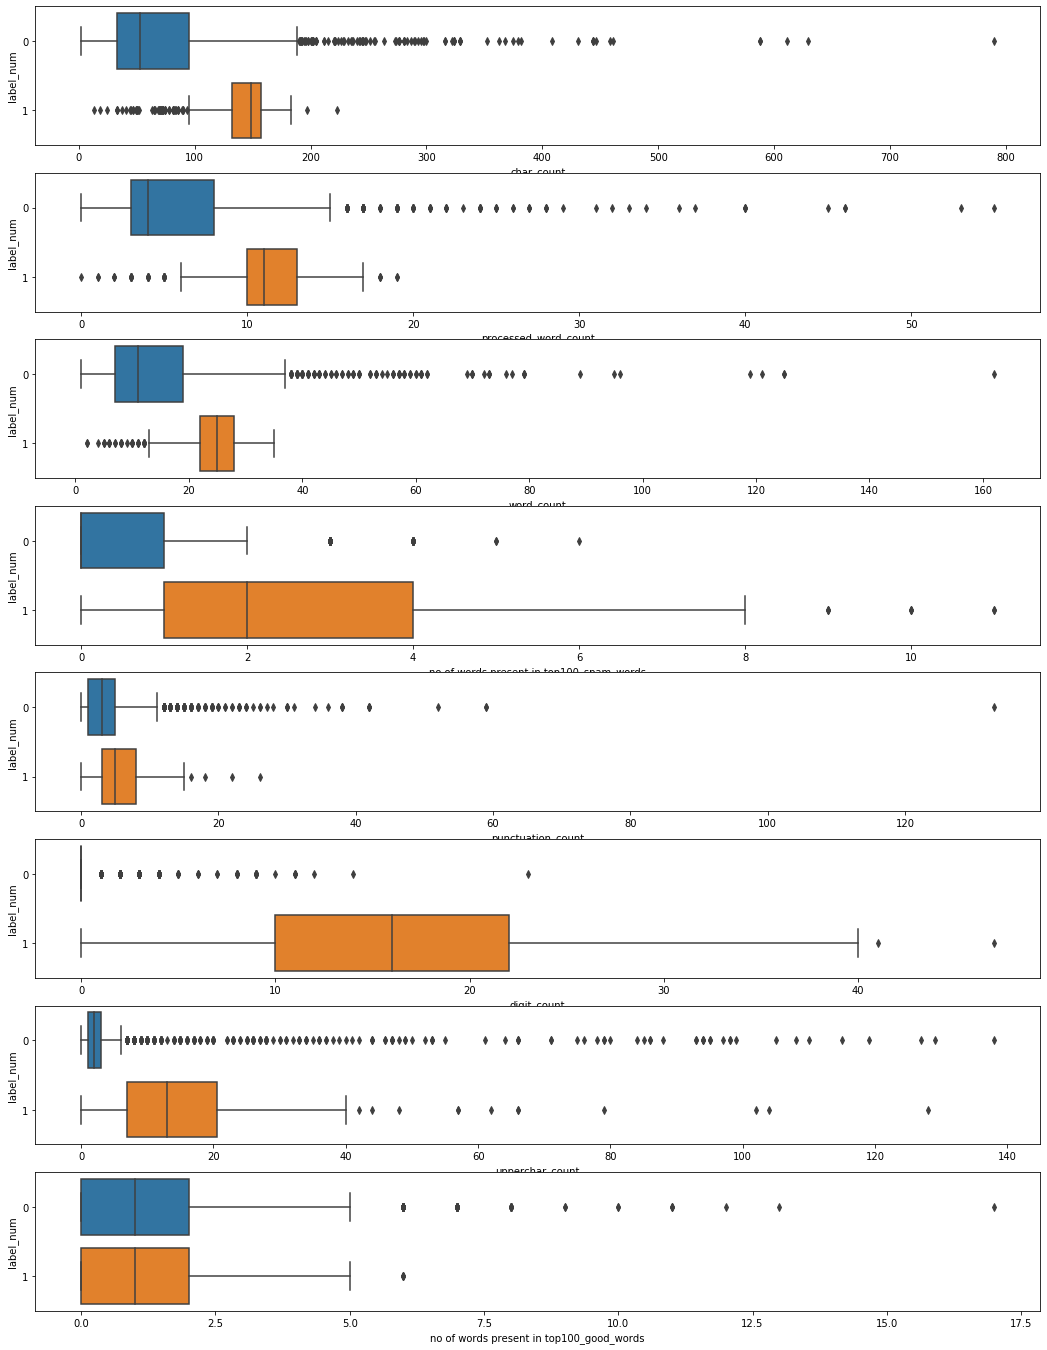

In [47]:
# Relationship between Response and the Predictors
trainDF = pd.concat([y_train, X_train.reindex(index=y_train.index)], sort = False, axis = 1)

f, axes = plt.subplots(8, 1, figsize=(18, 24))

count = 0
for var in X_train:
    sb.boxplot(x = var, y = "label_num", data = trainDF, orient = "h", ax = axes[count])
    count += 1

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9966499162479062

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9712849964106246



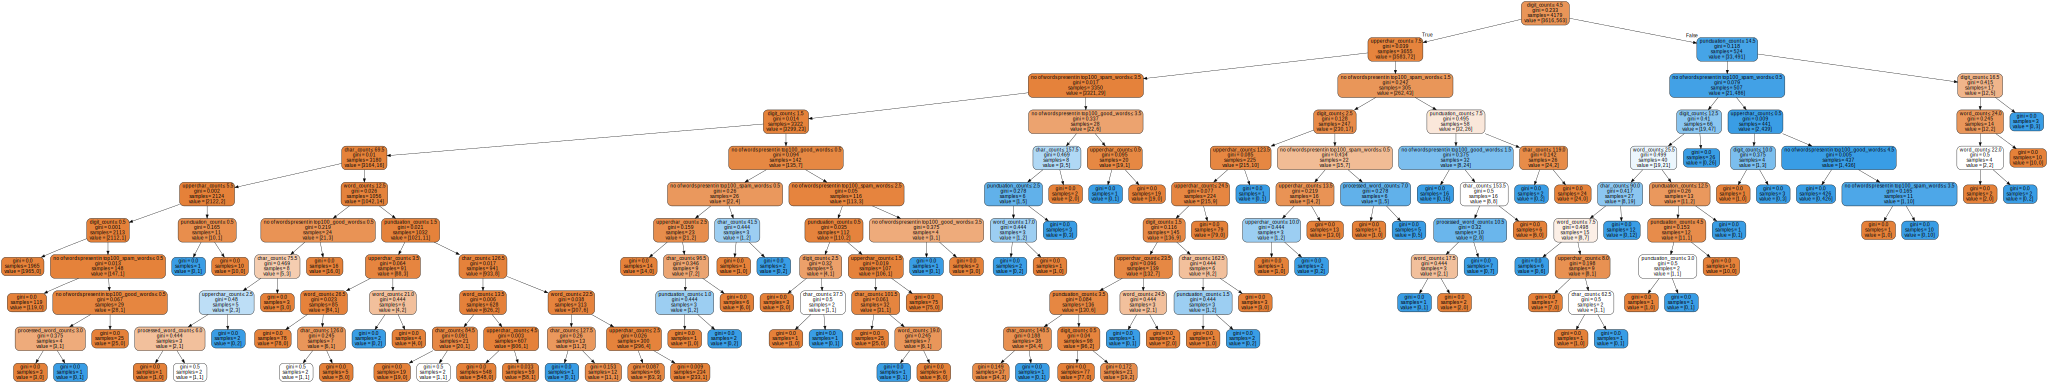

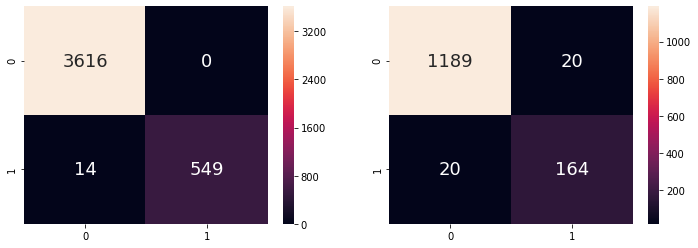

In [48]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Plot the Decision Tree
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

graphviz.Source(treedot)

## Using Random Forest for Features 1-8

In [49]:
# Extract Response and Predictors
y = pd.DataFrame(data["label_num"])
X = pd.DataFrame(data[["char_count", "processed_word_count", "word_count", "no of words present in top100_spam_words", "punctuation_count", "digit_count", "upperchar_count","no of words present in top100_good_words"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (4179, 1) (4179, 8)
Test Set  : (1393, 1) (1393, 8)


In [50]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 max_depth = 10)       # set the maximum depth of each tree

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9944962909787031

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.9849246231155779



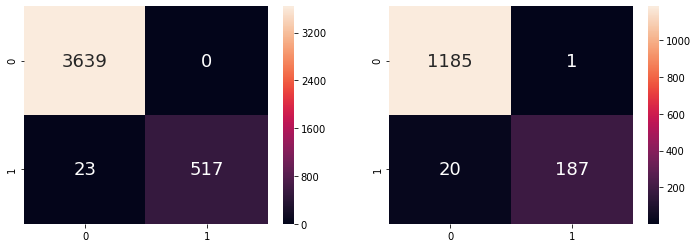

In [51]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix

# Predict 0/1 values corresponding to message
y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", rforest.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", rforest.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Analysis of Single Variate Decision Tree and Multi-Variate Decision Tree, Random Forest for all features (which is better)

There is an **uneven distribution** of dataset with the number of good messages being alot higher than the spam messages. Hence, results derived might be unreliable and inaccurate. It might be more biased towards good messages as there is a larger dataset for it to be trained and tested on. 


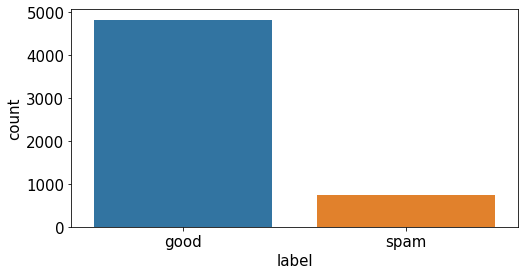

In [57]:
# plotting number of spam and good
label_count = pd.DataFrame()
label_count['count'] = data['label'].value_counts()
fig, ax = plt.subplots(figsize = (8, 4))
sb.barplot(x = label_count.index, y = label_count['count'], ax = ax)
ax.set_ylabel('count', fontsize = 15)
ax.set_xlabel('label',fontsize = 15)
ax.tick_params(labelsize=15)

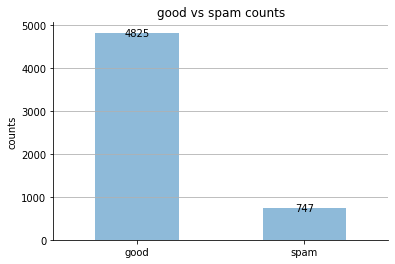

In [59]:
#visualize good vs spam counts
fig = plt.figure()
ax = fig.add_subplot(111)
data['label'].value_counts().plot(kind='bar', color = '#1f77b4', alpha=0.5, grid=True)
plt.ylabel('counts')
plt.title('good vs spam counts')
plt.xticks(rotation='horizontal')
ax.xaxis.grid(which="major")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center')

**Character Count** as a feature has a classification accuracy of about 0.896 which is fairly accurate. Spam messages usually have a higher character count as seen in the graph below. This might be because spam messages usually include lots of information and details regarding phone numbers, addresses, dates, prizes and these all adds into the character count. The grph below shows that spam messages have a higher probability of having a higher character count.

Text(0.5, 1.0, 'Char Count: Good vs Spam')

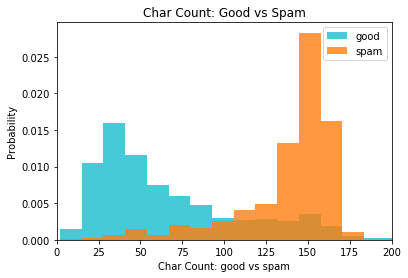

In [71]:
bins = np.histogram(np.hstack((data.loc[data.label=='good']['char_count'], data.loc[data.label=='spam']['char_count'])), bins=70)[1]
plt.hist(data.loc[data.label=='good']['char_count'], bins, density=True, color='#17becf', alpha=0.8, label='good')
plt.hist(data.loc[data.label=='spam']['char_count'], bins, density=True, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 200)
plt.xlabel('Char Count: good vs spam')
plt.ylabel('Probability')
plt.title('Char Count: Good vs Spam')


**Word Count** is similar to using character count, but it excludes punctuations, numbers and spaces. **Processed Word Count** is also similar to Word Count but it excludes stopwords and words with length less than 3. Word Count and Processed Word Count serve as additional features to character count to make these features more robust.

The codes below will compare between Processed Word Count and Word Count. It can be seen that Processed Word Count is significantly shorter than Word Count for both spam and good messages. Spam messages also have a higher word and processed word count.

spam length info
        word_count  processed_word_count
count  5572.000000           5572.000000
mean     15.676238              6.418880
std      11.485406              4.966344
min       1.000000              0.000000
25%       7.000000              3.000000
50%      12.000000              5.000000
75%      23.000000              9.000000
max     171.000000             64.000000

good length info
        word_count  processed_word_count
count  5572.000000           5572.000000
mean     15.676238              6.418880
std      11.485406              4.966344
min       1.000000              0.000000
25%       7.000000              3.000000
50%      12.000000              5.000000
75%      23.000000              9.000000
max     171.000000             64.000000


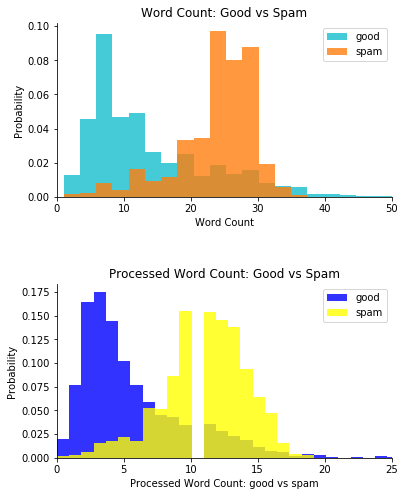

In [82]:
xmin = 0
xmax = 50
print ('spam length info')
print (data[['word_count', 'processed_word_count']].describe())
print ('\ngood length info')
print (data[['word_count', 'processed_word_count']].describe())

fig = plt.figure(figsize=(6,8))
ax1 = fig.add_subplot(2, 1, 1)
bins = np.histogram(np.hstack((data.loc[data.label=='good']['word_count'], data.loc[data.label=='spam']['word_count'])), bins=70)[1]
plt.hist(data.loc[data.label=='good']['word_count'], bins, density=True, color='#17becf', alpha=0.8, label='good')
plt.hist(data.loc[data.label=='spam']['word_count'], bins, density=True, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0,50)
plt.xlabel('Word Count')
plt.ylabel('Probability')
plt.title('Word Count: Good vs Spam')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = fig.add_subplot(2, 1, 2)
bins = np.histogram(np.hstack((data.loc[data.label=='good']['processed_word_count'], data.loc[data.label=='spam']['processed_word_count'])), bins=70)[1]
plt.hist(data.loc[data.label=='good']['processed_word_count'], bins, density=True, color='blue', alpha=0.8, label='good')
plt.hist(data.loc[data.label=='spam']['processed_word_count'], bins, density=True, color='yellow', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 25)
plt.xlabel('Processed Word Count: good vs spam')
plt.ylabel('Probability')
plt.title('Processed Word Count: Good vs Spam')

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.5)

**Top 100 Commonly Used Spam Words** and **Top 100 Commonly Used Good Words** are other features used for classification. However, it was found that spam words are better features than good words and are able to distinguish between spam and good messages better. This might be due to spam words being more unique to spam itself. Top 100 Commonly Used Spam Words gave a higher classification accuracy of around 0.906 but that of Top 100 Commonly Used Good Words is 0.870. 

Also, the top 100 is used as compared to top 10 or top 1000 as 10 would be too few and many sentences might not contain that 10 words while 1000 would be too many and of lesser significance to the classification.

**Punctuation Count** is another feature used for classification. 

Text(0.5, 1.0, 'Punctuation Count: Good vs Spam')

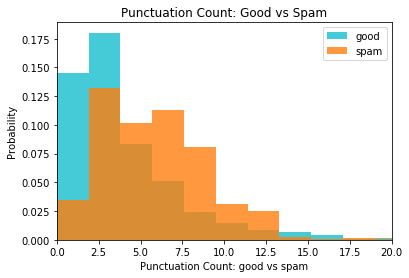

In [85]:
bins = np.histogram(np.hstack((data.loc[data.label=='good']['punctuation_count'], data.loc[data.label=='spam']['punctuation_count'])), bins=70)[1]
plt.hist(data.loc[data.label=='good']['punctuation_count'], bins, density=True, color='#17becf', alpha=0.8, label='good')
plt.hist(data.loc[data.label=='spam']['punctuation_count'], bins, density=True, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 20)
plt.xlabel('Punctuation Count: good vs spam')
plt.ylabel('Probability')
plt.title('Punctuation Count: Good vs Spam')


As seen above, spam messages has more punctuations that include $,#,&,* and !. They might be to express urgency or money to get the attention of the receiver.

**Digit Count** as a single variable is pretty accurate with a classification accuracy of 0.976. This might be because spam messages usually contain lots of numeric values due to phone numbers, money prizes or date as the senders would want to attract the attention of the receivers and contact them back.

Text(0.5, 1.0, 'Digit Count: Good vs Spam')

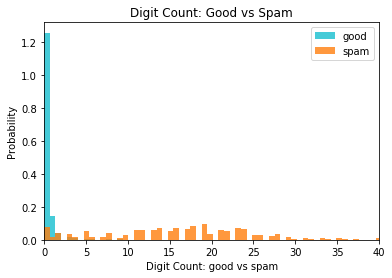

In [87]:
bins = np.histogram(np.hstack((data.loc[data.label=='good']['digit_count'], data.loc[data.label=='spam']['digit_count'])), bins=70)[1]
plt.hist(data.loc[data.label=='good']['digit_count'], bins, density=True, color='#17becf', alpha=0.8, label='good')
plt.hist(data.loc[data.label=='spam']['digit_count'], bins, density=True, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 40)
plt.xlabel('Digit Count: good vs spam')
plt.ylabel('Probability')
plt.title('Digit Count: Good vs Spam')


As seen from above, spam messages has significantly higher number of digits. Hence, this might be one of the better features in classifying spam and good messages.

**Uppercase Count** is another feature used. It might be the usual case that spam messages will have a higher uppercase count to attract the readers attention. 'URGENT' can attract the readers' attention more than 'urgent'. However, there are some anomalies in good messages where people usually type their message fully in uppercase to express surprise or frustration. Hence, Uppercase Count can only classify spam and good messages to a limited extent.

Text(0.5, 1.0, 'Char Count: Good vs Spam')

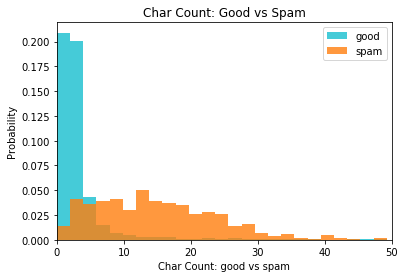

In [89]:
bins = np.histogram(np.hstack((data.loc[data.label=='good']['upperchar_count'], data.loc[data.label=='spam']['upperchar_count'])), bins=70)[1]
plt.hist(data.loc[data.label=='good']['upperchar_count'], bins, density=True, color='#17becf', alpha=0.8, label='good')
plt.hist(data.loc[data.label=='spam']['upperchar_count'], bins, density=True, color='#ff7f0e', alpha=0.8, label='spam')
plt.legend(loc='upper right')
plt.xlim(0, 50)
plt.xlabel('Char Count: good vs spam')
plt.ylabel('Probability')
plt.title('Char Count: Good vs Spam')


**Multi-variate Decision Tree** is better than the single decision tree as it combines all the features, hence all features can be used at different levels of the tree to give a high classification accuracy.

**Random forest** is able to generalize much better to the testing data than the single decision tree or the multi-variate decision tree. The random forest has lower variance while maintaining the low bias of a decision tree. This is because the random forest is essentially a collection of decision trees. 

A decision tree is built on an entire dataset, using all the features as mentioned earlier whereas a random forest randomly selects specific features to build multiple decision trees from and then averages the results. 

Thus, we can conclude that the random forest will give the highest classification accuracy and that the 8 features listed above will serve to provide better predications in classifications. From the single variate decision tree, it can be seen that digit count has the highest classification accuracy.

References

https://github.com/haojing9058/SMS-Spam-Classification/blob/master/sms%20code.ipynb
https://github.com/WillKoehrsen/Machine-Learning-Projects/blob/master/Random%20Forest%20Tutorial.ipynb
https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/
https://github.com/rajat-1994/sms_spam_detection/blob/master/spam_detector.ipynb
https://github.com/shwetasit/Text-mining-Ham-Spam-text-Classification/blob/master/Text_Spam
https://www.kaggle.com/larui529/spam-vs-ham-text-filter
https://medium.com/@sharadjoshi/sms-spam-detection-45a9d6564d90
https://github.com/happilyeverafter95/Medium/blob/master/spam_or_ham.py